In [2]:
import numpy as np
import matplotlib.pyplot as plt

Just some testing on trying the Gaussian Distribution (The classifier is below)

In [3]:
#Implement Gaussian Distribution Function
def Gaussian(x, mu, sig):
    px = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(x-mu)**2/(2*sig**2))
    return px

In [4]:
print(Gaussian(0, 0, 1))

0.3989422804014327


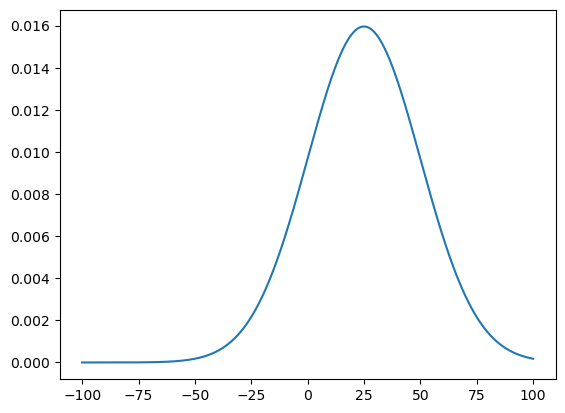

In [5]:
#Now to plot the values of Gaussian distribution
x = np.arange(-100, 100, 0.0001)

px = np.zeros(shape=len(x))

for i in range(len(x)):
    px[i] = Gaussian(x[i], 25, 25)

plt.plot(x, px)


In [6]:
import sklearn as sk
import sklearn.datasets as skds
iris = skds.load_iris()

In [7]:
def MLEmean(data, label):
    sumOfX = 0
    for i in range(len(data)):
        sumOfX += data[i] * label[i]

    total = 0
    for i in range(len(data)):
        total += label[i]
    
    return sumOfX / total

In [8]:
def MLEstd(data, label):
    mean = MLEmean(data, label)
    sum = 0
    for i in range(len(data)):
        sum += ((data[i] - mean)**2) * label[i]
    
    total = 0
    for i in range(len(label)):
        total += label[i]
        
    return np.sqrt(sum/total)

In [10]:
X = iris.data[:, 1]

mean = np.mean(X[:50])
mean

std = np.std(X[:50])
std

0.37525458025186054

My Implementation of a Naive Bayes Classifier (assuming a Gaussian Distribution) for 1D data

In [11]:
def GaussianNaiveBayesClassifier1D(x, X, labels, classToCheck):
    y1 = (labels == classToCheck).astype(int)
    y2 = (labels != classToCheck).astype(int)

    d1 = distance(x, X, y1)
    d2 = distance(x, X, y2)

    return (d1 > d2).astype(int)

def distance(x, X, y):
    m = MLEmean(X, y)
    std = MLEstd(X, y)
    
    prior = np.sum(y)/len(y)
    d = -np.log(std) - (x - m)**2/(2*std**2) + np.log(prior)
    return d

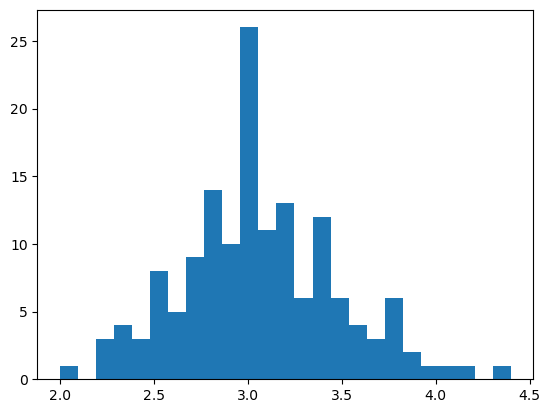

In [13]:
plt.hist(X, bins = 25)
plt.show()

In [18]:
x = 3.4
X = iris.data[:, 1]
labels = iris.target
classToCheck = 0

GaussianNaiveBayesClassifier1D(x, X, labels, classToCheck)

1

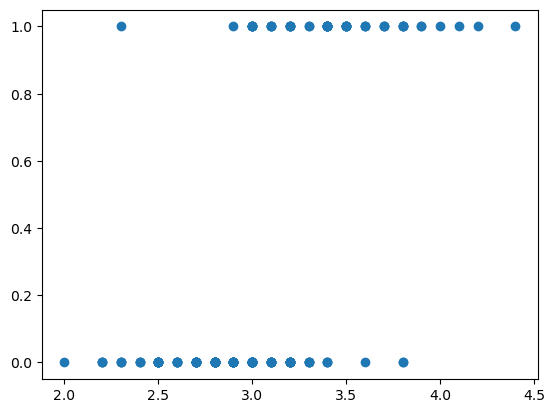

In [19]:
plt.scatter(X, (labels == 0).astype(int))

SKLearn's Gaussian Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

X = iris.data[:, 1]
y = (iris.target == 0).astype(int)
gnb.fit(X.reshape(-1, 1), y.reshape(-1, 1))
pred = gnb.predict([[3.31]])
pred

c:\Users\unova\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1])

In [21]:
from sklearn.linear_model import Perceptron

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[5.7]])
y_pred

c:\Users\unova\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1])

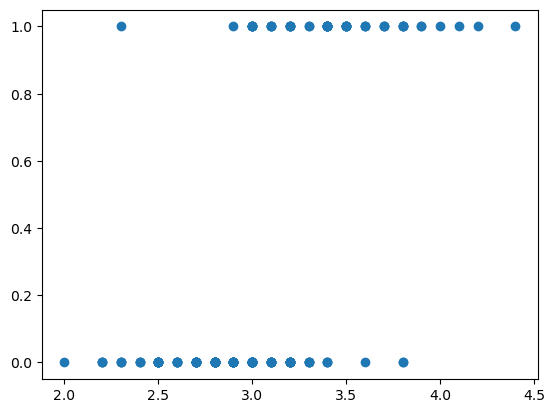

In [ ]:
plt.scatter(X, y)

In [ ]:
import scipy.stats as stats
stats.normaltest(X)

NormaltestResult(statistic=array([3.12383225]), pvalue=array([0.20973381]))

In [ ]:
mean = MLEmean(X, y)
mean
mean = np.mean(X[y == 1])
mean

3.428

In [ ]:
std = MLEstd(X, y)
std = np.std(X[y == 1])
std

0.37525458025186054

In [ ]:
#given a data point we check its distance from the mean of each class
y1 = (labels == 0).astype(int)
y2 = (labels != 0).astype(int)

m1 = MLEmean(X, y1)
m2 = MLEmean(X, y2)

std1 = MLEstd(X, y1)
std2 = MLEstd(X, y2)

#We find the distance from the mean of each class
x = 3
d1 = np.linalg.norm(x - m1)
d2 = np.linalg.norm(x - m2)

#Lets change the discriminant formula
#We will use the discriminant function to classify the data point

n = np.arange(3,4, 0.00001)

for x in n:
    d1 = -np.log(std1) - (x - m1)**2/(2*std1**2) + np.log(0.33)
    d2 = -np.log(std2) - (x - m2)**2/(2*std2**2) + np.log(0.67)
    if d1 > d2:
        print(x)
        break


# print(d1 > d2)
#Now this works
#probably because the priors and variance are not the same? Most likely 
#Now lets turn this into its own function

3.3116200000020415
